### CNN-mnist-모델테스트 1

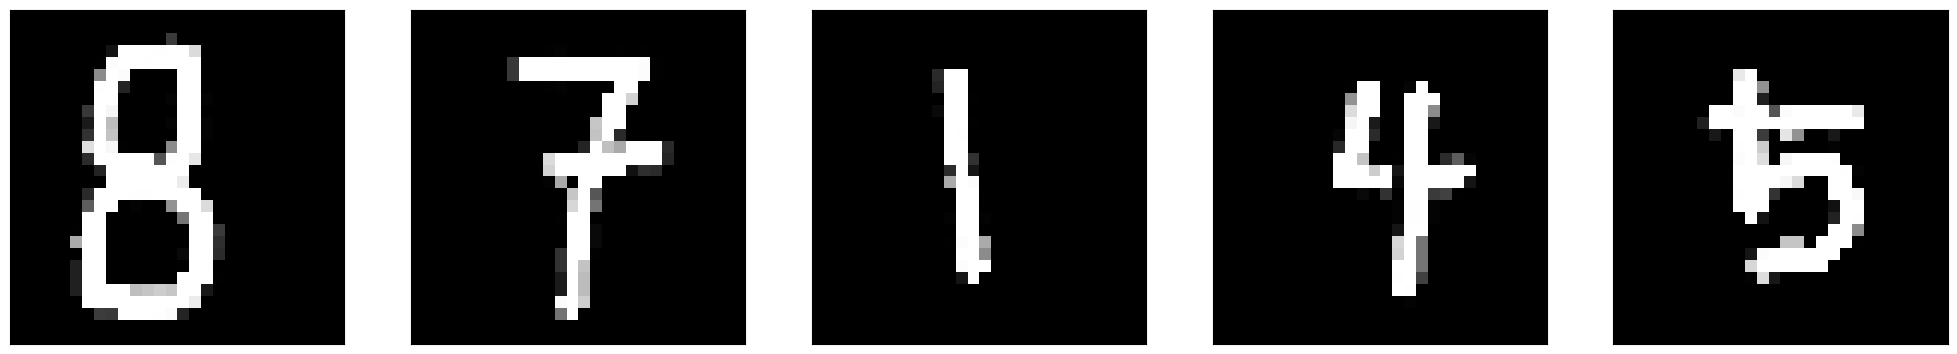

1/1 [==============================] - 0s 82ms/step


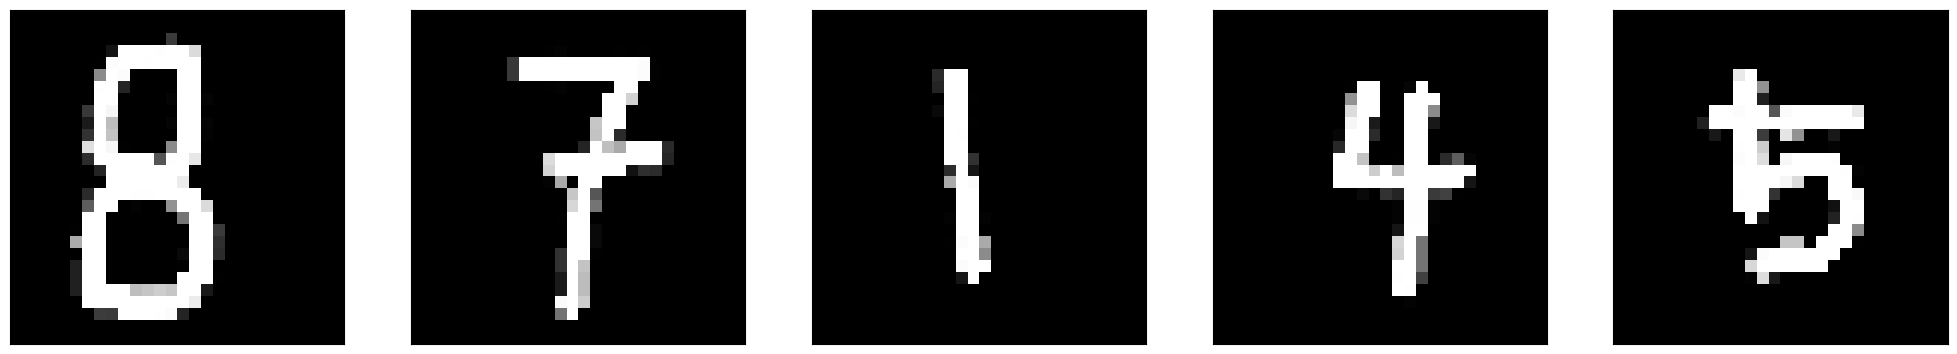

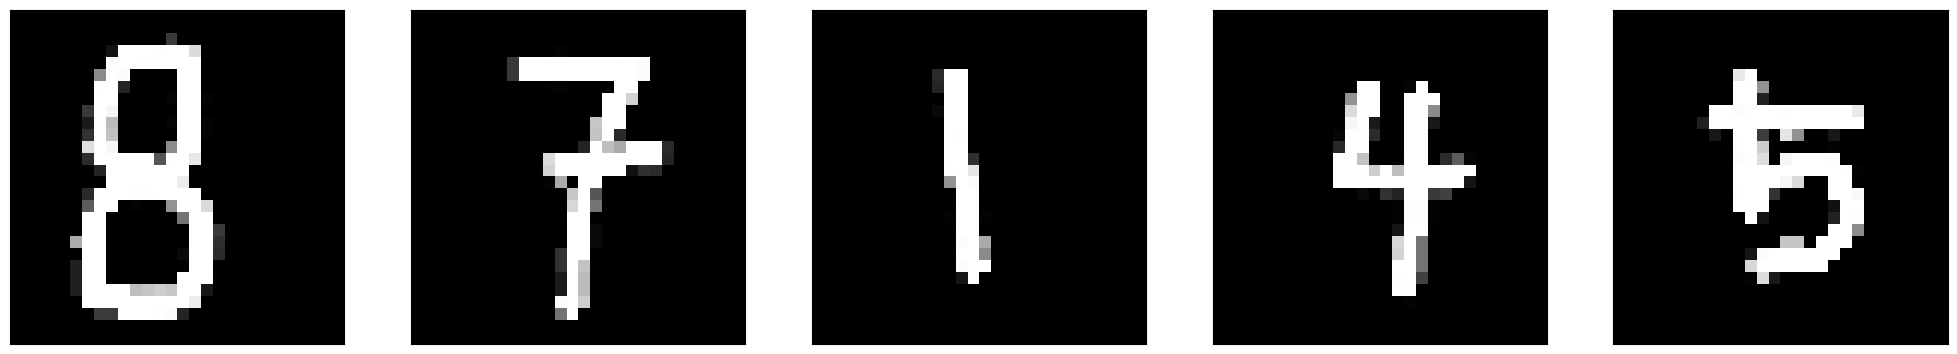

1/1 [==============================] - 0s 29ms/step


In [6]:
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt

model=tf.keras.models.load_model('cnn_v2.h5')

def reset():
    global img      

    img=np.ones((200,520,3),dtype=np.uint8)*255

    for i in range(5):
        cv.rectangle(img,(10+i*100,50),(10+(i+1)*100,150),(0,0,255))
    cv.putText(img,'e:erase s:show r:recognition q:quit',(10,40),cv.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),1)

def grab_numerals():
    numerals=[]

    for i in range(5):
        roi=img[51:149,11+i*100:9+(i+1)*100,0]
#                행            열           채널
        roi=255-cv.resize(roi,(28,28),interpolation=cv.INTER_CUBIC)
        numerals.append(roi)  
    numerals=np.array(numerals)

    return numerals

def show():
    numerals=grab_numerals()
    plt.figure(figsize=(25,5))

    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(numerals[i],cmap='gray')
        plt.xticks([])
        plt.yticks([])

    plt.show()    

def recognition():
    numerals=grab_numerals()   
    numerals=numerals.reshape(5,28,28,1)
    numerals=numerals.astype(np.float32)/255.0
    res=model.predict(numerals)
    class_id=np.argmax(res,axis=1)

    for i in range(5):
        cv.putText(img,str(class_id[i]),(50+i*100,180),cv.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1)

BrushSiz=4
LColor=(0,0,0)

def writing(event,x,y,flags,param):
    if event==cv.EVENT_LBUTTONDOWN:
        cv.circle(img,(x,y),BrushSiz,LColor,-1)

    # left button을 누르고 움직일 때
    elif event==cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_LBUTTON:
        cv.circle(img,(x,y),BrushSiz,LColor,-1)

reset()

cv.namedWindow('Writing')
cv.setMouseCallback('Writing',writing)

while(True):
    cv.imshow('Writing',img)
    key=cv.waitKey(1)

    if key==ord('e'):
        reset()
    elif key==ord('s'):
        show()        
    elif key==ord('r'):
        recognition()
    elif key==ord('q'):
        break    

cv.destroyAllWindows()